# Getting Started

This notebook provides a brief introduction to how PoreSpy works. PoreSpy is designed to use [Numpy](https://numpy.org) arrays as images, and more specifically boolean images with `True` indicating the phase of interest (usually the void phase), so a good understanding of Numpy is required to get the most from PoreSpy.

In [42]:
import matplotlib.pyplot as plt
import scipy.ndimage as spim

import porespy as ps

ps.visualization.set_mpl_style()

## Generating Artificial Images

PoreSpy includes a variety of functions for generating artificial image which are useful for prototyping and testing.  Below we generate `blobs`:

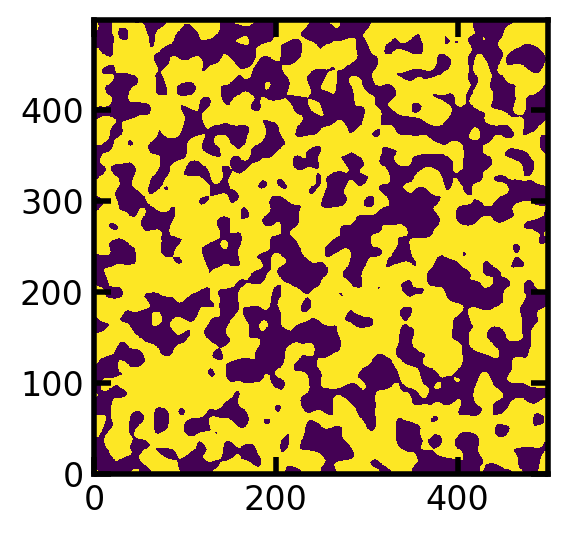

In [43]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.6, blobiness=2)

fig, ax = plt.subplots(figsize=[3, 3])
ax.imshow(im);

A full list of generator functions and how to use them can be found [here](https://porespy.org/_examples/generators/index.html).

## Applying Filters



A common filter to apply is the local thickness, which replaces every voxel with the radius of a sphere that overlaps it. Analysis of the histogram of the voxel values provides information about the pore size distribution.

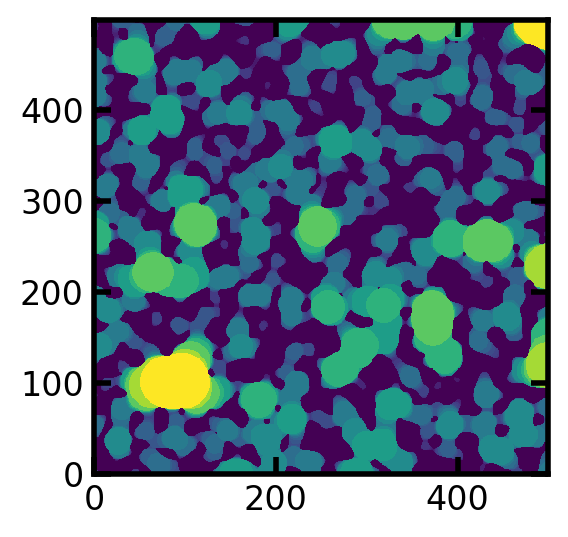

In [44]:
lt = ps.filters.local_thickness(im)

fig, ax = plt.subplots(figsize=[3, 3])
ax.imshow(lt);

A less common filter is the application of chords that span the pore space in a given direction. It is possible to gain information about anisotropy of the material by looking at the distributions of chords lengths in each principle direction.

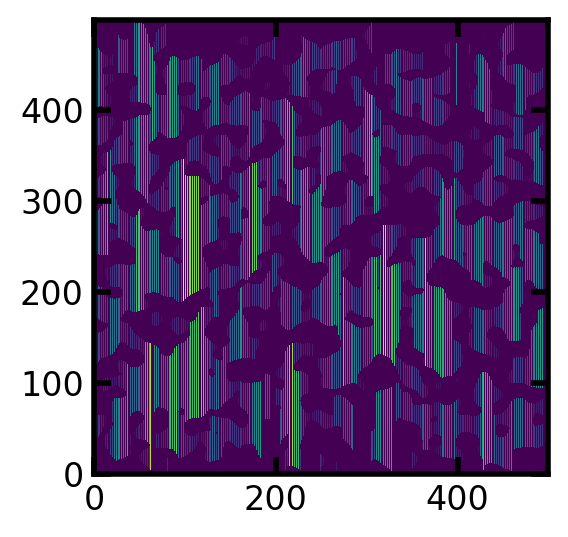

In [45]:
cr = ps.filters.apply_chords(im)
labels, N = spim.label(cr)
cr = ps.filters.flood(cr, labels=labels, mode='size')

fig, ax = plt.subplots(figsize=[3, 3])
ax.imshow(cr);

## Calculating Metrics

The metrics sub-module contains several common functions that analyze binary tomogram directly. Examples are simple porosity, as well as two-point correlation function.


### Two-Point Correlation

The metrics sub-module contains several common functions that analyze binary tomogram directly. Examples are simple porosity, as well as two-point correlation function.

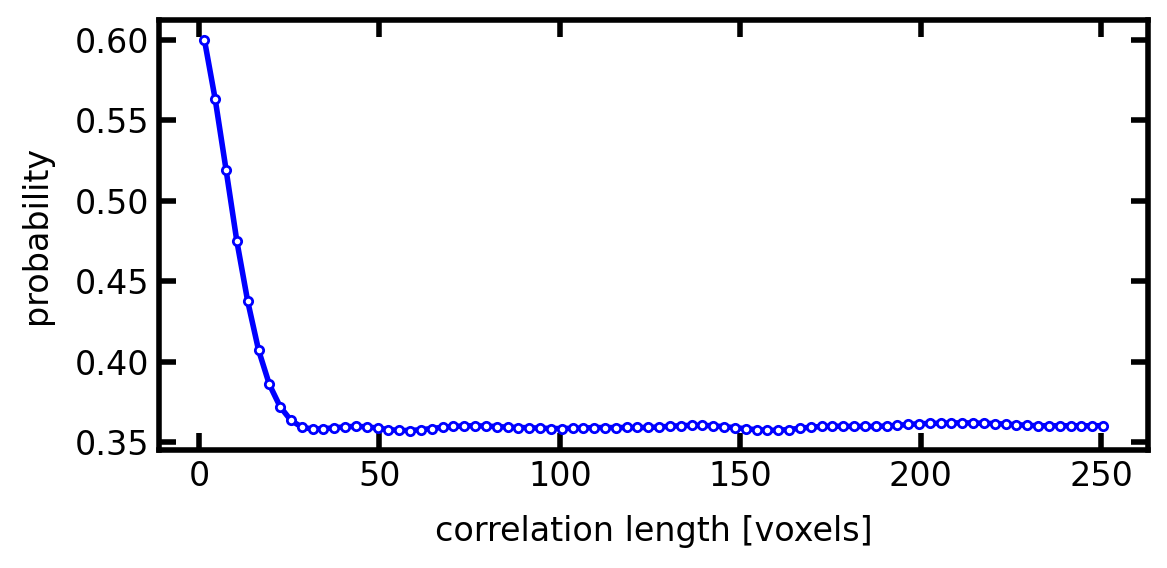

In [46]:
data = ps.metrics.two_point_correlation(im)

fig, ax = plt.subplots(figsize=[6, 3])
ax.plot(data.distance, data.probability_scaled, 'bo-', markersize=3)
ax.set_ylabel('probability')
ax.set_xlabel('correlation length [voxels]');

### Porosimetry 

The metrics sub-module also contains a suite of functions that produce plots based on values in images that have passed through a filter, such as local thickness.

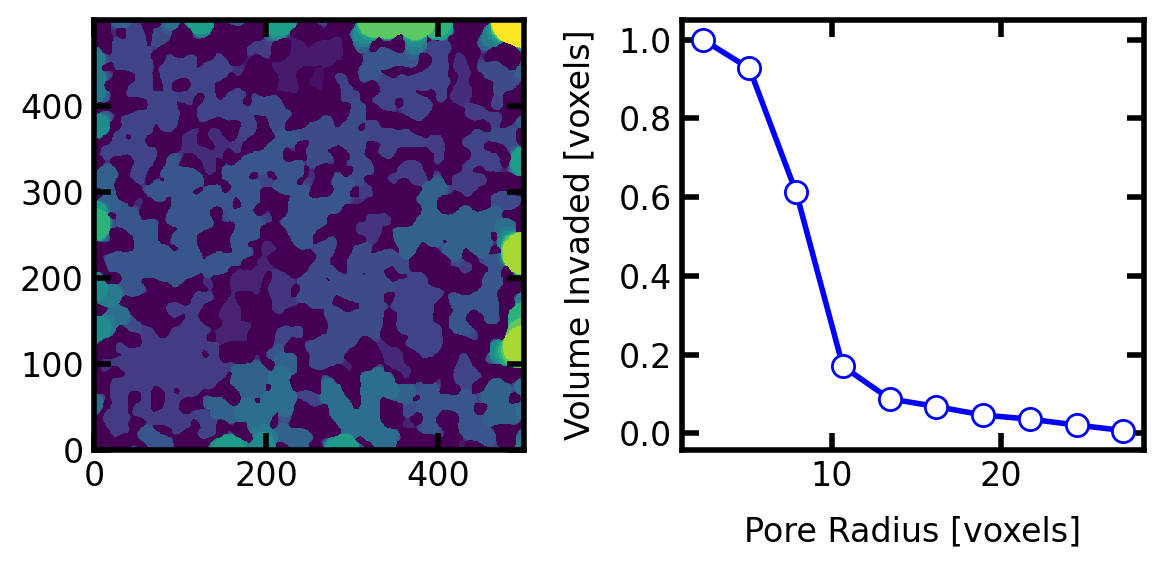

In [47]:
mip = ps.filters.porosimetry(im)
data = ps.metrics.pore_size_distribution(mip, log=False)

fig, ax = plt.subplots(1, 2, figsize=[6, 3])
ax[0].imshow(mip)
# Now show intrusion curve
ax[1].plot(data.R, data.cdf, 'bo-')
ax[1].set_xlabel('Pore Radius [voxels]')
ax[1].set_ylabel('Volume Invaded [voxels]');